# Exploratory Analysis

In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
training = pd.read_csv("training_embed.csv")

test = pd.read_csv("valid_embed.csv")

In [ ]:


# Basic info about dataset
print("Shape:", training.shape)
print("\nColumn names:", training.columns)
print("\nMissing values:\n", training.isnull().sum())

# See some random rows
training.sample(50)

# Check label distribution
print("\nLabel distribution:")
print(training['label'].value_counts())


Shape: (9543, 10)

Column names: Index(['text', 'label', 'clean_text', 'nouns', 'adjectives', 'verbs',
       'word_count', 'bert_embedding', 'financialBERT_embedding',
       'llama_embedding'],
      dtype='object')

Missing values:
 text                        0
label                       0
clean_text                 24
nouns                       0
adjectives                  0
verbs                       0
word_count                  0
bert_embedding              0
financialBERT_embedding     0
llama_embedding             0
dtype: int64

Label distribution:
label
2    6178
1    1923
0    1442
Name: count, dtype: int64


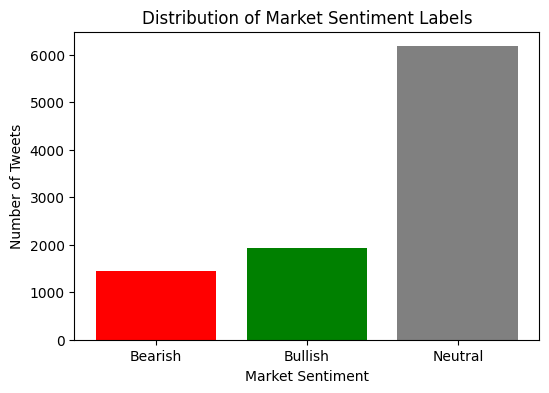

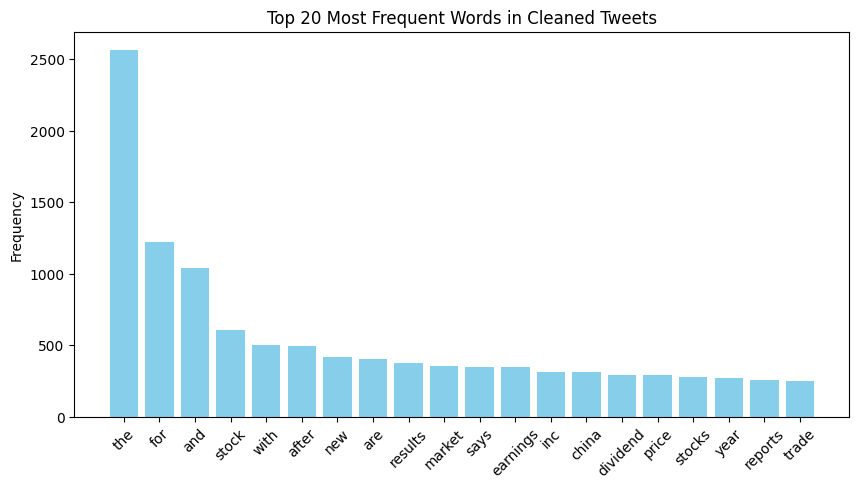

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Label distribution
label_counts = training['label'].value_counts().sort_index()
labels_map = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}

plt.figure(figsize=(6,4))
plt.bar([labels_map[i] for i in label_counts.index], label_counts.values, color=['red', 'green', 'gray'])
plt.title('Distribution of Market Sentiment Labels')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# 2. Top 20 most common words
all_words = ' '.join(training['clean_text'].dropna().astype(str)).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Frequent Words in Cleaned Tweets')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()
